In [49]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display plots inline
%matplotlib inline

# Setting random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully.")


Libraries imported successfully.


In [50]:
# Load the Iris dataset
url = 'iris.csv'
iris_data = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_data.head())


First few rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [51]:
#deleting Id column
iris_data = iris_data.drop(columns = ["Id"])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
#display the stats of dataset
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
#Count of each species
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [55]:
# Check for unique values in the 'species' column
print("\nUnique species in the dataset:")
print(iris_data['Species'].unique())


Unique species in the dataset:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\HITESHKAVATI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


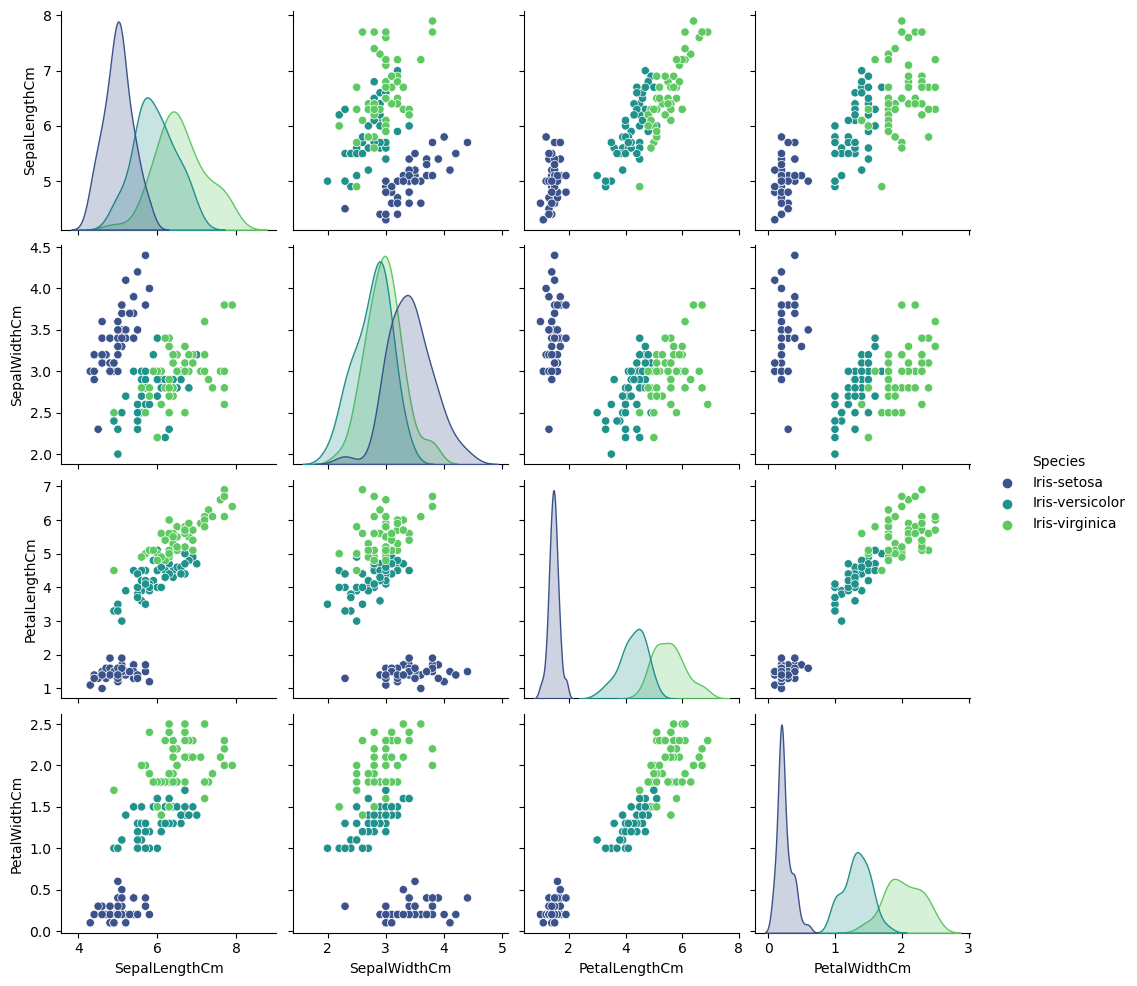

In [56]:
# Data visualization
sns.pairplot(iris_data, hue='Species', palette='viridis')
plt.show()


In [57]:
Species = iris_data['Species'].value_counts().reset_index()
Species

,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


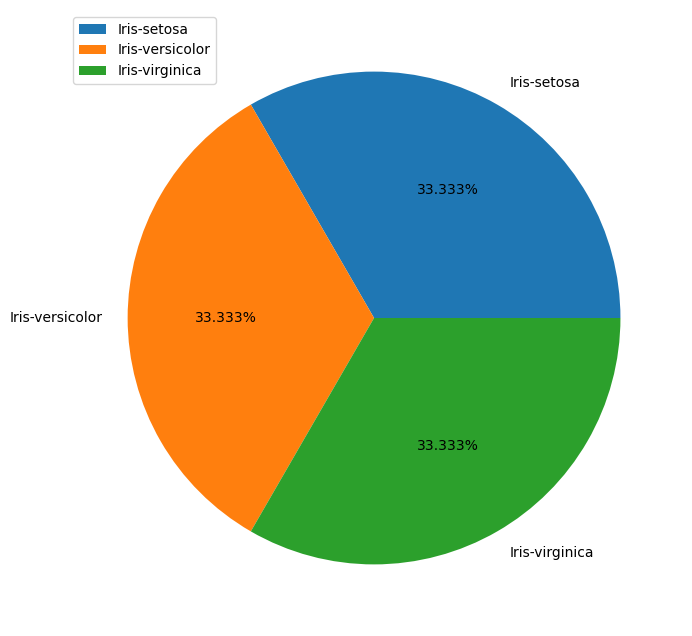

In [58]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

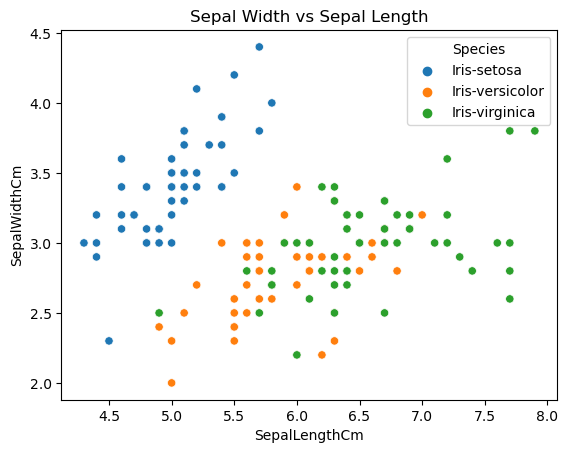

In [59]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_data, hue='Species')
plt.title('Sepal Width vs Sepal Length')
plt.show()

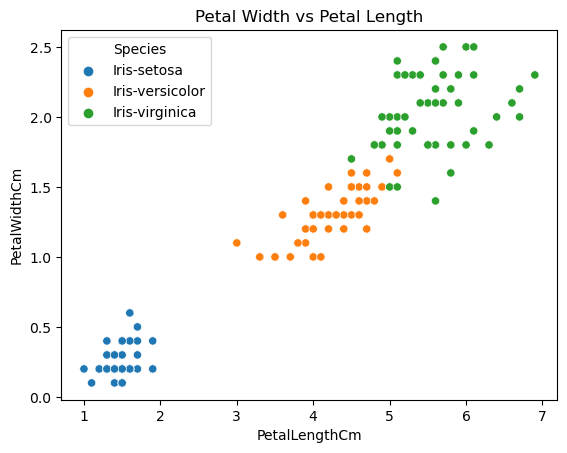

In [60]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_data, hue='Species')
plt.title('Petal Width vs Petal Length')
plt.show()

In [61]:
newdf = iris_data.drop(columns='Species',axis=1)

<Axes: >

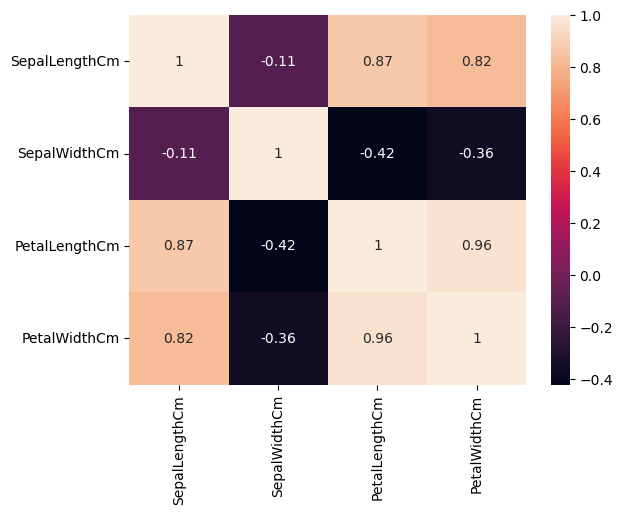

In [62]:
sns.heatmap(newdf.corr(), annot=True)

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [65]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
X = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
knn.score(X_test, y_test)

1.0

In [71]:
knn.predict(X_test)

array([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 1, 0, 0])

In [72]:
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


In [73]:
# Prepare the input data
input_data = np.array([[6.0, 2.2, 4.0, 1.0]])

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions
prediction = knn.predict(input_data_scaled)

# Map the predicted numeric class label to the corresponding Iris species
species_map = {
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
}
predicted_species = species_map[prediction[0]]

print("Predicted species:", predicted_species)


Predicted species: Setosa


C:\Users\HITESHKAVATI\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HITESHKAVATI\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
